In [1]:
from test import  *

# Installation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Introduction

Engineering applications of linear algebra are everywhere: electric circuits, statics and dynamics, digital signal processing, optimization, robotics, multi-body dynamics… you name it!


- For physicists, a vector is an "arrow" of a given length (magnitude) and direction. It can represent directional quantities like velocity, force, acceleration.

- For computer scientists, a vector is an ordered list of numbers. It can represent a set of variables or features stored in order.

- For mathematicians, vectors are generic objects that behave a certain way when they are added or scaled


**What is vector**

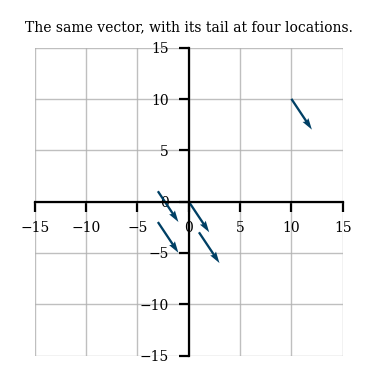

In [3]:
# move 2 co-ordinate in x direction and 3 co-ordinate in y-direction
vectors = [(2,-3)]  

# starting points
tails = [(10,10),(-3,-2), (-3,1), (0,0), (1,-3)]

plot_vector(vectors, tails)
plt.title("The same vector, with its tail at four locations.");
plt.show();

`norm:` 
> By default represent vector as Column Vector

> by default we assume every vector as origin

# Operations

## addition

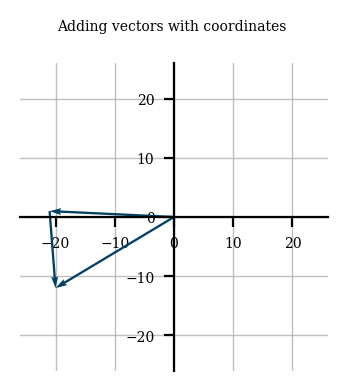

In [4]:
a = numpy.array((-21,1))
b = numpy.array((1,-13))
origin = numpy.array((0,0))

vectors = [a, b, a+b]
tails   = [origin, a, origin]
plot_vector(vectors, tails)
plt.title("Adding vectors with coordinates \n");

## scaling

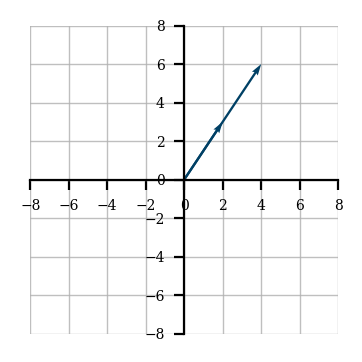

In [5]:
c = np.array((2,3))
vectors = [c,2*c]
plot_vector(vectors)

will talk more in future lesson in Eigen and SVD and in terms of Diagnalization 

### Unit vector

In [6]:
i = np.array((1,0))
j = np.array((0,1))

scale in x-axis: [1.2 3. ]
scale in y-axis: [3.  1.2]
matrix:
[[1.2 3. ]
 [3.  1.2]] 



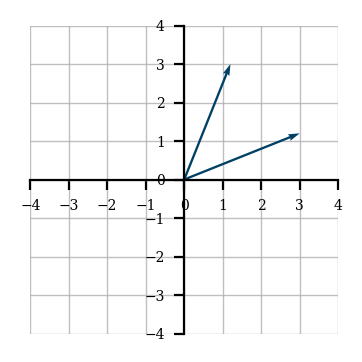

In [7]:
matrix = np.array([
    [1.2,3],
    [3,1.2]
])

print(f"scale in x-axis: {matrix.dot(i)}")
print(f"scale in y-axis: {matrix.dot(j)}")

print(f"matrix:\n{matrix} \n")

plot_vector(matrix)

### change unit vector and check

scale in x-axis: [ 6. 15.]
scale in y-axis: [3.  1.2]
matrix:
[[1.2 3. ]
 [3.  1.2]] 

scaled matrix:
[[ 6.  15. ]
 [ 3.   1.2]]


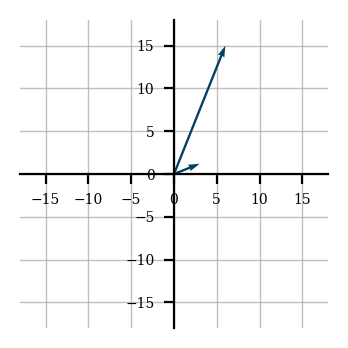

In [8]:
i = np.array((5,0))
j = np.array((0,1))

print(f"scale in x-axis: {matrix.dot(i)}")
print(f"scale in y-axis: {matrix.dot(j)}")

print(f"matrix:\n{matrix} \n")
scaled_matrix = np.stack([matrix.dot(i),matrix.dot(j)])
print(f"scaled matrix:\n{scaled_matrix}")

plot_vector([matrix.dot(i),matrix.dot(j)])

**Normal Vector**

In [9]:
i = np.array([1,0])
j = np.array([0,1])

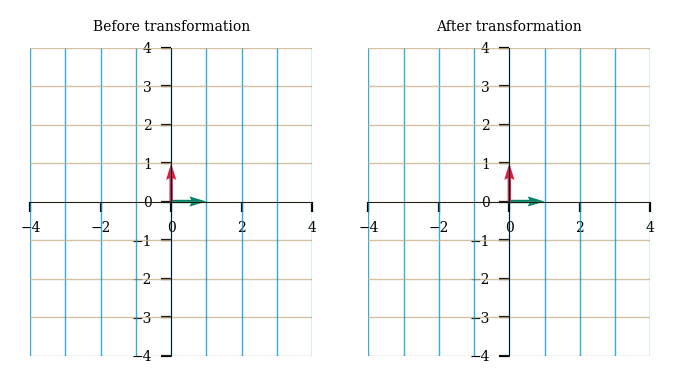

In [10]:
# normal
plot_linear_transformation(np.stack([i,j]))

## shrinking

In [11]:
print(f"exploding : {(1.001)**99}")
print(f"vanishing : {(0.9)**99}")

exploding : 1.104011686034721
vanishing : 2.9512665430652825e-05


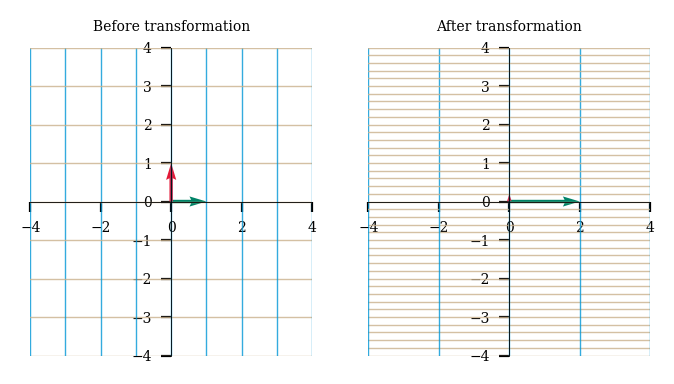

In [12]:
plot_linear_transformation(np.stack([[2,0],[0,0.2]]))

## strecthing

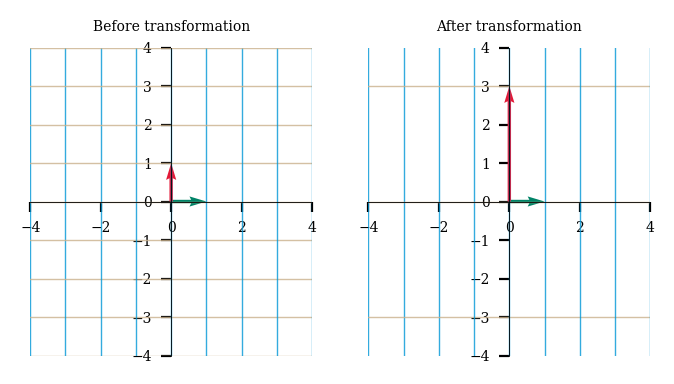

In [13]:
plot_linear_transformation(np.stack([i,[0,3]]))

## shearing

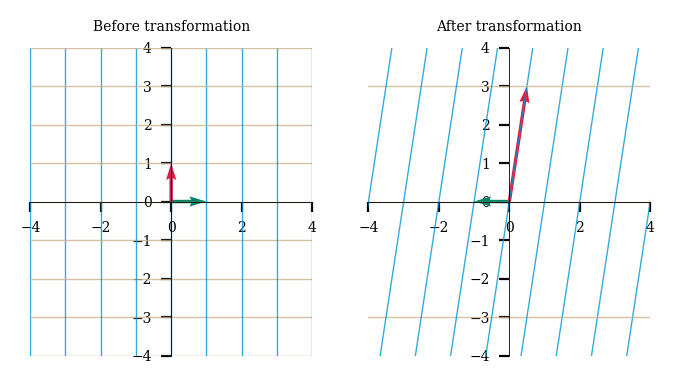

In [14]:
plot_linear_transformation(np.stack([[-1,.5],[0,3]]))

## relefcting: determinant<0

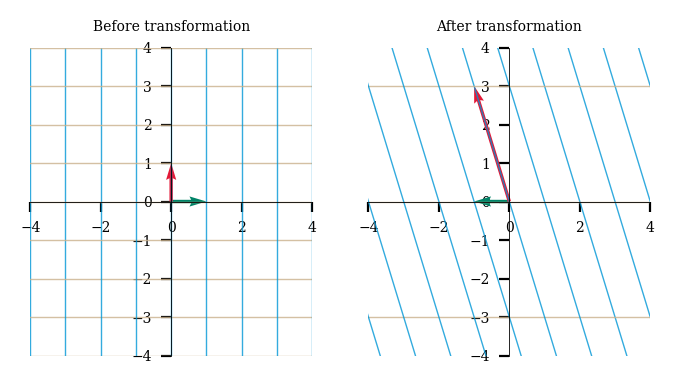

In [15]:
plot_linear_transformation(np.stack([[-1,-1],[0,3]]))

## rotation: orthonormal

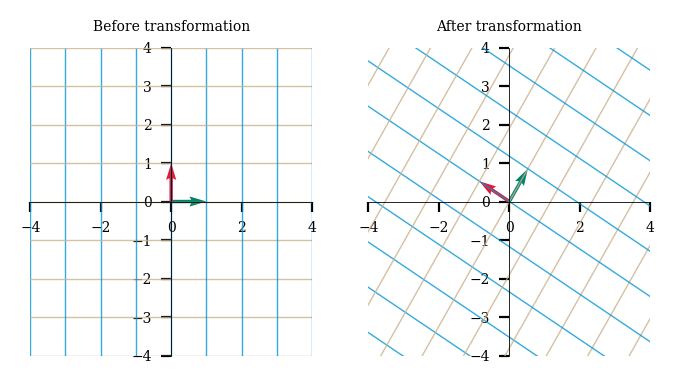

In [16]:
degree = 45

rotation_matrix = np.array([
    [np.cos(degree), -np.sin(degree)],
    [np.sin(degree), np.cos(degree)]
])

plot_linear_transformation( rotation_matrix )

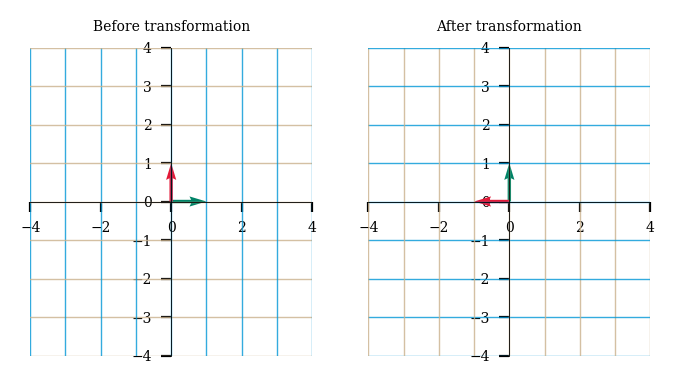

In [17]:
rotation_matrix = np.stack([[0,-1],[1,0]])
plot_linear_transformation(rotation_matrix)

**One more:: adding bias helps to shift distribution called Affine Transformation**

Intution
- rotation
- shear
- reflection
- scaling
- shifting

In [18]:
shear = np.array([[1,1],[0,1]])
shear

array([[1, 1],
       [0, 1]])

In [19]:
rotation_matrix = np.array([[ 0, -1],[ 1,  0]])
rotation_matrix

array([[ 0, -1],
       [ 1,  0]])

how my vector gonna behave if my I do matrix multiplication?? :blush:

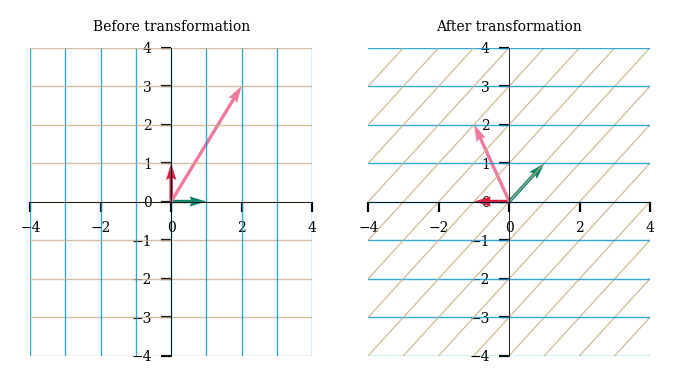

In [20]:
my_vector = np.array([2,3])
matrix_mul = np.matmul(shear,rotation_matrix) # shear@rotation_matrix

plot_linear_transformation(matrix_mul,my_vector)

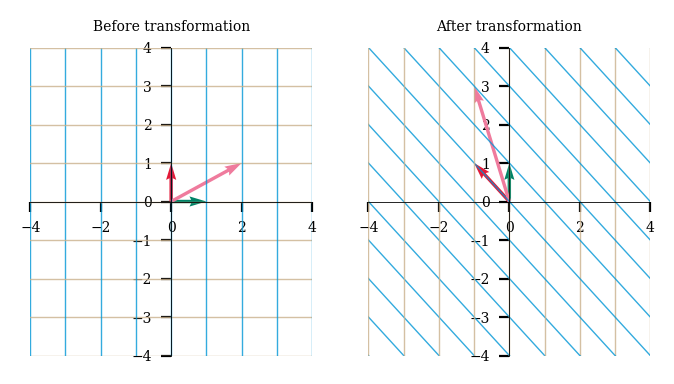

In [21]:
my_vector = np.array([2,1])
matrix_mul = np.matmul(rotation_matrix,shear) # shear@rotation_matrix

plot_linear_transformation(matrix_mul,my_vector)

#### `Inference:`  matrix multiplication is not commutative

**Example:**

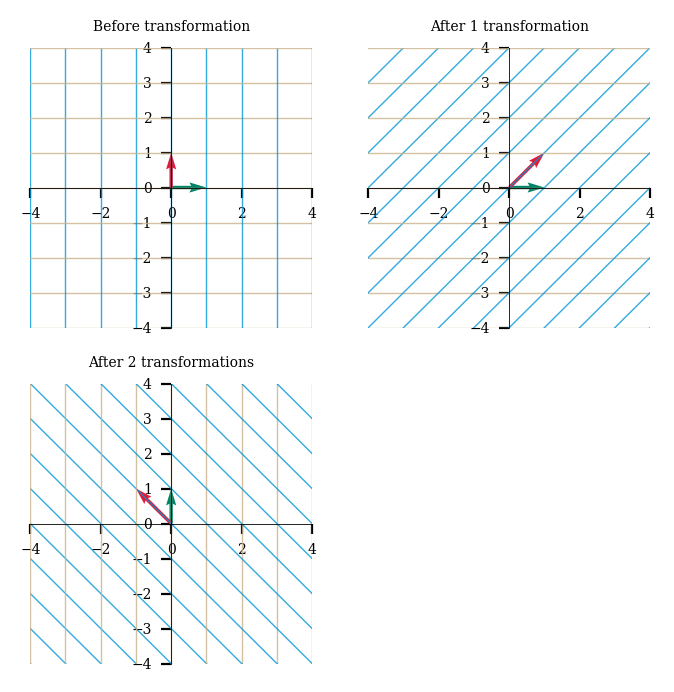

In [22]:
# shear and rotate space
plot_linear_transformations(shear,rotation_matrix)

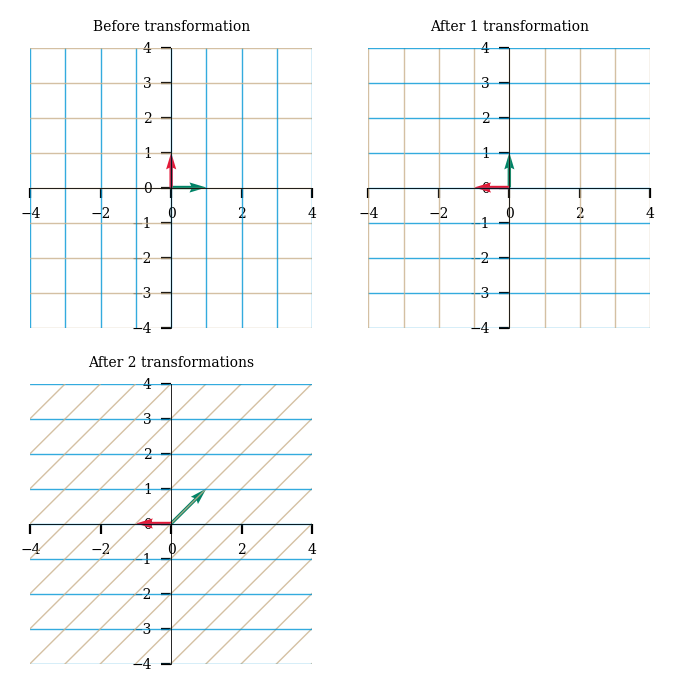

In [23]:
# rotate and shear space
plot_linear_transformations(rotation_matrix,shear)

Order matters So, **Inverse Matrix do it operation in reverse manner**

In [24]:
matrix = shear@rotation_matrix
matrix_inv = np.linalg.inv(shear@rotation_matrix)

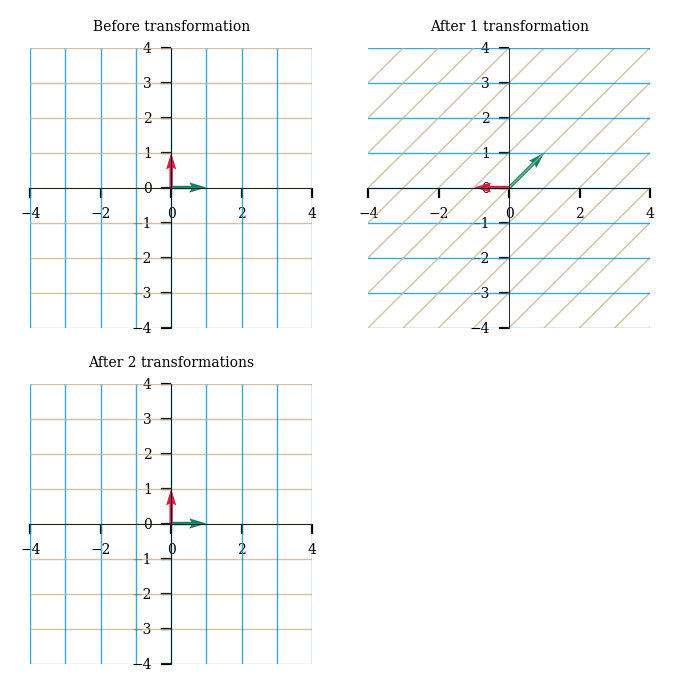

In [25]:
plot_linear_transformations(matrix,matrix_inv)

Identity matrix do nothing...

[[ 1  1]
 [-1  1]]


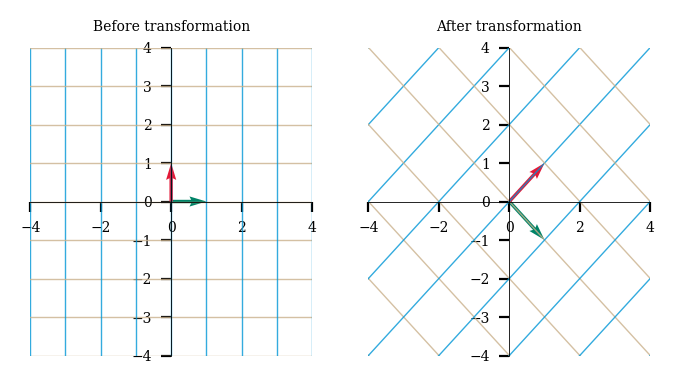

In [26]:
A = np.array([[1,1],[-1,1]])
print(A)
plot_linear_transformation(A)

# vector space

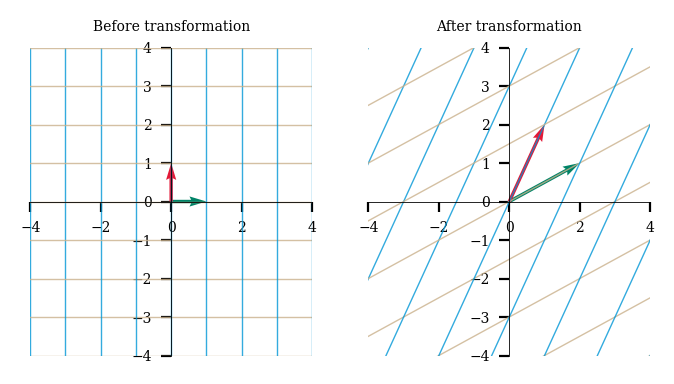

In [27]:
# your vector space gonna change like

C = numpy.array([[2,1], [1,2]])
plot_linear_transformation(C)

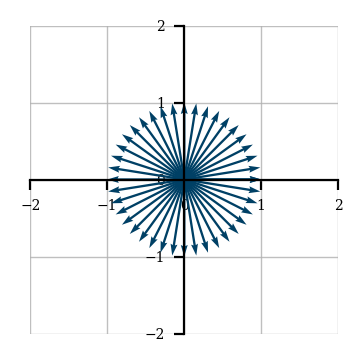

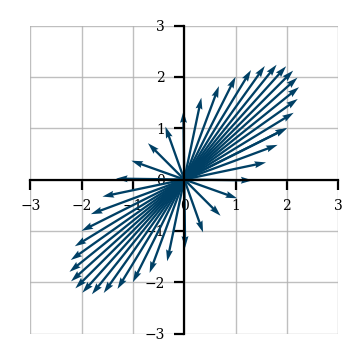

In [28]:
# what's happen in vector space

alpha = numpy.linspace(0, 2*numpy.pi, 41) 
vectors = list(zip(numpy.cos(alpha), numpy.sin(alpha)))

plot_vector(vectors)

newvectors = []
for i in range(len(vectors)):
    newvectors.append(C.dot(numpy.array(vectors[i])))

plot_vector(newvectors)

enter favourite number a.k.a arrow but within 41:  35


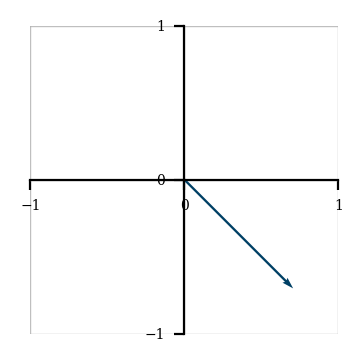

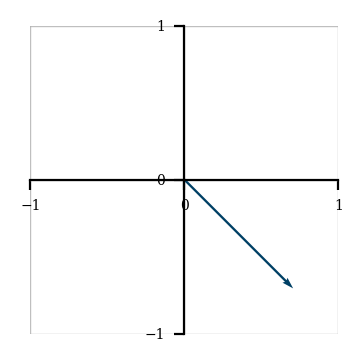

In [32]:
Nth_vector = int(input(f"enter favourite number a.k.a arrow but within {len(vectors)}: "))
plot_vector([vectors[Nth_vector]])

# run this cell how it's transforming
Nth_vector_change = C.dot(numpy.array(vectors[Nth_vector]))
plot_vector([Nth_vector_change])

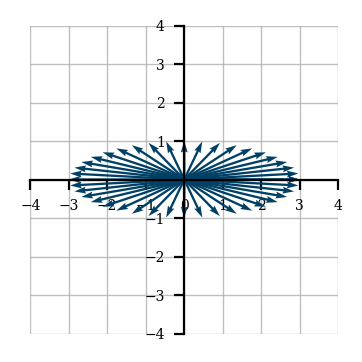

In [33]:
S = numpy.array([[3,0], [0,1]])
ellipse = []
for i in range(len(vectors)):
    ellipse.append(S.dot(numpy.array(vectors[i])))

plot_vector(ellipse)

## Vectors, OKay? check

To construct Plane, what we need...

    - point
    - norm of plane :(
    
What is norm of vector....?  pshhh!!!
what about two points?

Why can't we do?
System of linear equation

$$ A X = B$$
$$  X = A^{-1} B$$


Limitations:
--- 
- Equal unknowns equal variable... otherwise fail

- Possibilities:

    - Fat and Long Tail 
    


# Typical Example: 


Classification of Fishes :)

- How to Represent Dataset in Equation classification setting $$D = { (x_i,y_i)^n_i ;  x_i∈R_d ; y_i∈(-1,1)}$$

- How to Represent Dataset in Equation regression setting $$D = { (x_i,y_i)^n_i ;  x_i∈R_d ; y_i∈R}$$

#### Exercise:
- what about multiclass setting?




## General equation of Line, Plane, Hyperplane

##### Topic I

- plane passes through origin      $$W^T x=0$$
- plane not passes through origin/ perpendicular distance from origin to plane(a)  $$W^Tx+w0=0; where \, a=  \frac{-w0}{||W||}$$

##### Topic II

- Half Space  $$ W^T X + W0 <=> 0$$

##### Topic III

- distance between point and plane

$$d_q = \frac{W^T \, * \, X_q}{||W||}$$


- Two plane are parallel and equidistance from origin, what's distance ? $$= \frac{W_1+W_2}{||W||}$$ $$= \frac{2W}{||W||}$$
- Watch mentioned videos
    
    Best of best: http://3b1b.co/eola (highly highly recommended)

In [34]:
from IPython.display import Video

#go 2D to 5D

Video('matrix multiplication.mkv',width=620,height=450)

Input: 2D (x,y)

Output: 5D (R,O,Y,B,G)
    
    - e.g) Red = (1,0,0,0,0)

In linear algebra, we did our co-ordinate space crush , crumble and make like hill but our problem still finished :(

$$ f(W_i,W0) = \max \sum_{\forall i \in 1}^n  y_i * {{W^T*x_i + W }\over W};    W_i ∈ R_d and W ∈ R  $$

# Cosine Similarity

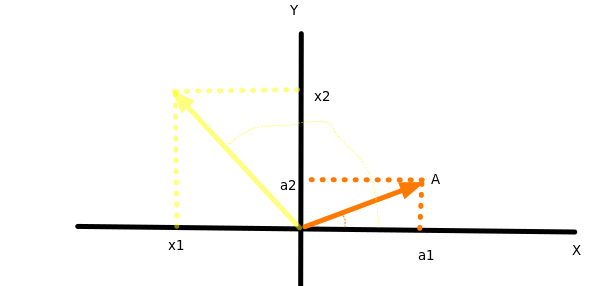


matrix connection to trignometry
    $$a^T*x = a1*x1 + a2*x2$$
    $$a^T*x = ||a|| cos \theta * ||x|| cos \theta + ||a|| sin\lambda * ||x|| sin \lambda$$
    $$a^T*x = ||a||* ||x|| * ( cos \theta cos \lambda + sin \theta* sin \lambda )$$
    $$a^T*x = ||a||* ||x|| * cos (\theta-\lambda)$$
    $$a^T*x = ||a||* ||x|| * cos \gamma$$

- Amazon Recommendation 2003

https://www.google.com/url?sa=t&source=web&rct=j&url=https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf&ved=2ahUKEwicqMip6tv8AhUyzDgGHdMDAbMQFnoECDAQAQ&usg=AOvVaw3m__k3kFLi6IgI98TtrXHB


- Physics: $$Work = Force*distance * cos \theta$$
